In [1]:
languages=['Assamese','Hindi','Bengali','Punjabi','Kannada','Marathi','Odiya','Tamil','Telugu','Malayalam','Gujarati']
models=['bert-base-multilingual-cased','distilbert-base-multilingual-cased','gpt2','Indic_Bert','xlm-roberta-base','xlnet-base-cased']

In [29]:
language_model_metrics=[]
metric_value=0
# metric_list=['accuracy']
average_metric=0
for language in languages:
    for model_name in models:
        filepath=f"{model_name}/Metrics_{language}_{model_name}.txt"
        with open(filepath,'r') as file:
            content=file.read()
            data_dict=eval(content)
            metric_value=data_dict['eval_runtime']
            model_tuple=(model_name,metric_value)
            language_tuple=(language,model_tuple)
            language_model_metrics.append(language_tuple)

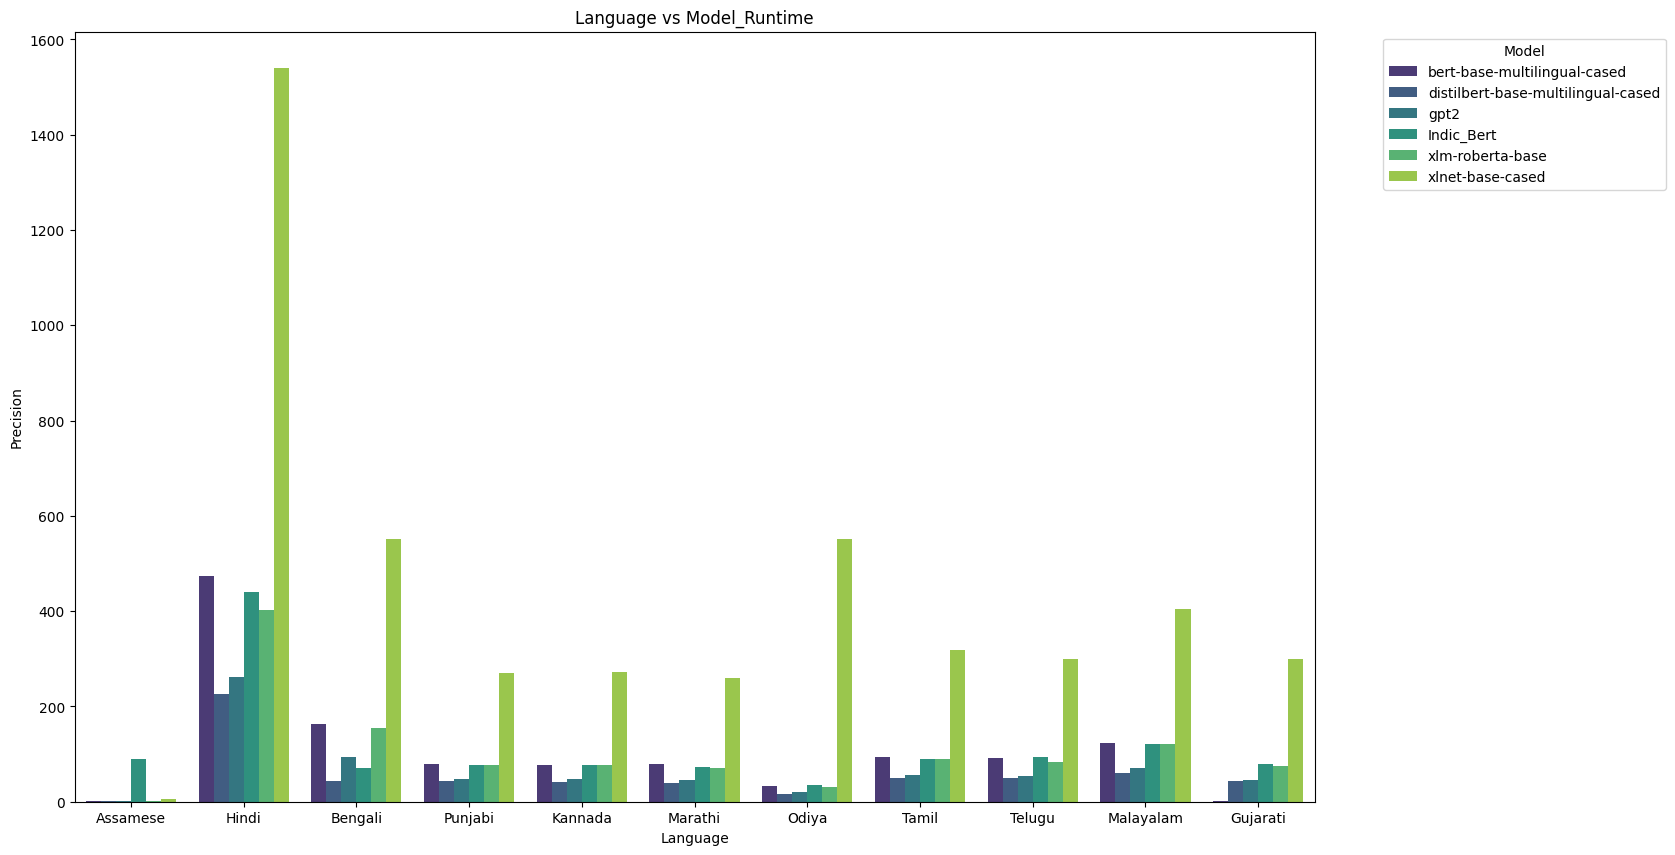

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your data
data = language_model_metrics

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data, columns=['Language', 'Model'])

# Split the 'Model' column into 'Model Name' and 'Score'
df[['Model Name', 'Score']] = pd.DataFrame(df['Model'].tolist(), index=df.index)

# Create a grouped bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x='Language', y='Score', hue='Model Name', data=df, palette='viridis')
plt.title('Language vs Model_Runtime')
plt.xlabel('Language')
plt.ylabel('Precision')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Runtime.jpg")


In [41]:
#PREPROCESSING FOR VISUALIZATION

#Traversing all the files to aggregate data and creating a dictionary

net_metric=0
average_metric=0
# metrics_list=['accuracy','f1','precision','recall',] Defining the required metrics for plot
#metrics_list=['loss']

model_list_metrics=[]
for model_name in models:
     for metric_name in metrics_list: #Iterating through  different metrics like f1 and accuracy
        average_metric=0
        net_metric=0
        for language_name in languages: #Iterating through each language
            filepath=f"{model_name}/Metrics_{language_name}_{model_name}.txt" #Browsing files
            with open(filepath, 'r') as file:
                content = file.read()
                data_dict = eval(content)
                net_metric=net_metric+data_dict[f'eval_{metric_name}']
        average_metric=(net_metric/11)
        metric_value=(metric_name,average_metric)
        model_metric_value=(model_name,metric_value)
        model_list_metrics.append(model_metric_value)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Given data
data = model_list_metrics
df = pd.DataFrame(data, columns=['Model', 'Metric'])

# Extracting loss values
df['Loss'] = df['Metric'].apply(lambda x: x[1])

# Set the style
sns.set(style="whitegrid")

# Plot the data using Seaborn (line plot)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Loss', data=df, marker='o', color='r')
plt.title('Model Loss Comparison')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.savefig('Loss.png')


NameError: name 'model_list_metrics' is not defined

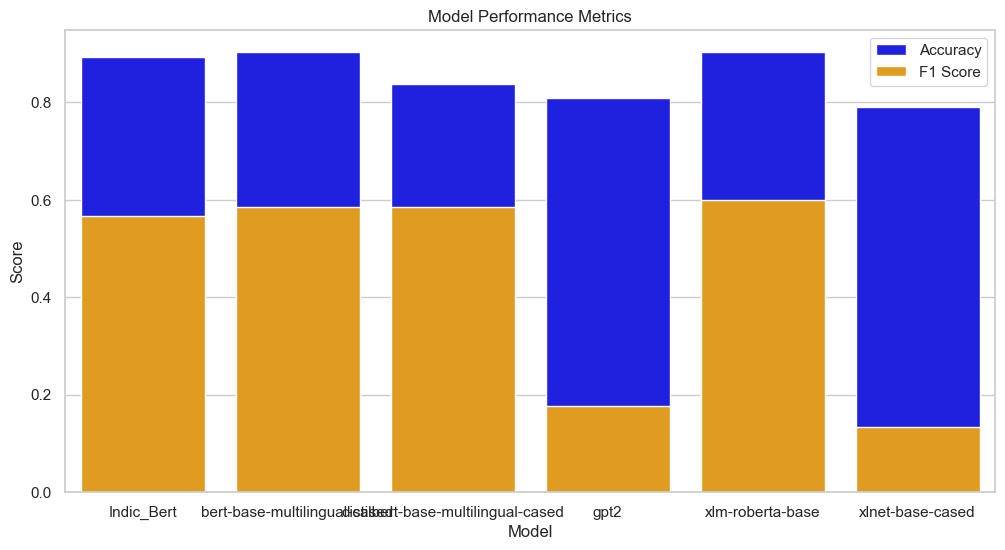

In [7]:

df_pivot = df.pivot(index='Model', columns='Metric', values='Score')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=df_pivot.index, y=df_pivot['accuracy'], color='blue', label='Accuracy')
sns.barplot(x=df_pivot.index, y=df_pivot['f1'], color='orange', label='F1 Score')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.legend()
plt.savefig("model2.png")


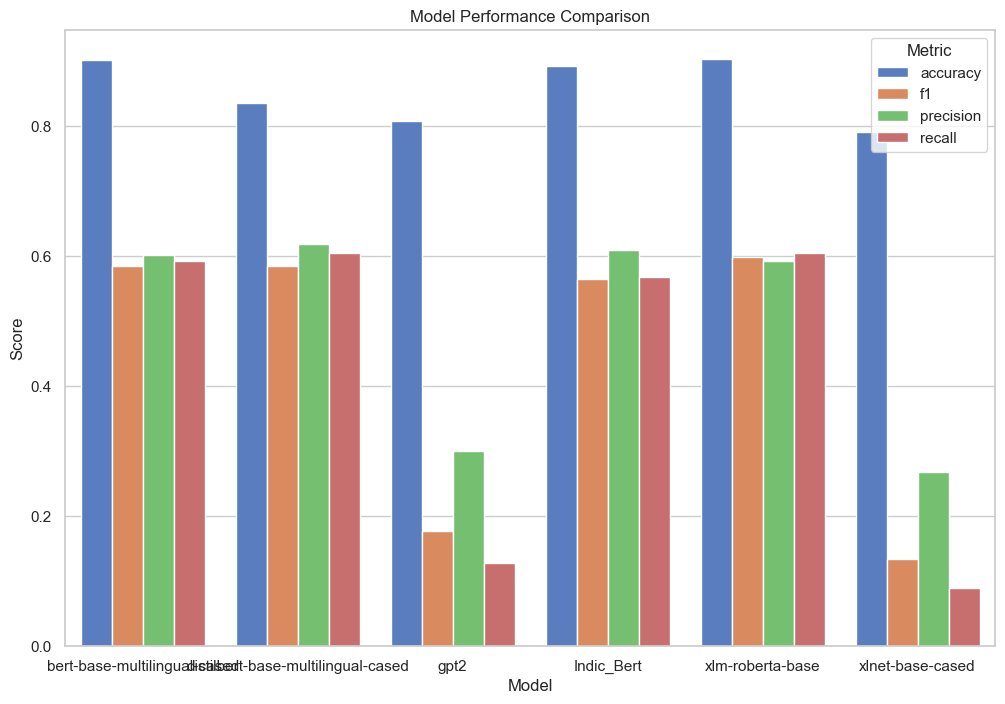

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df, palette='muted')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.savefig("Multi_Metric_Scores.png")


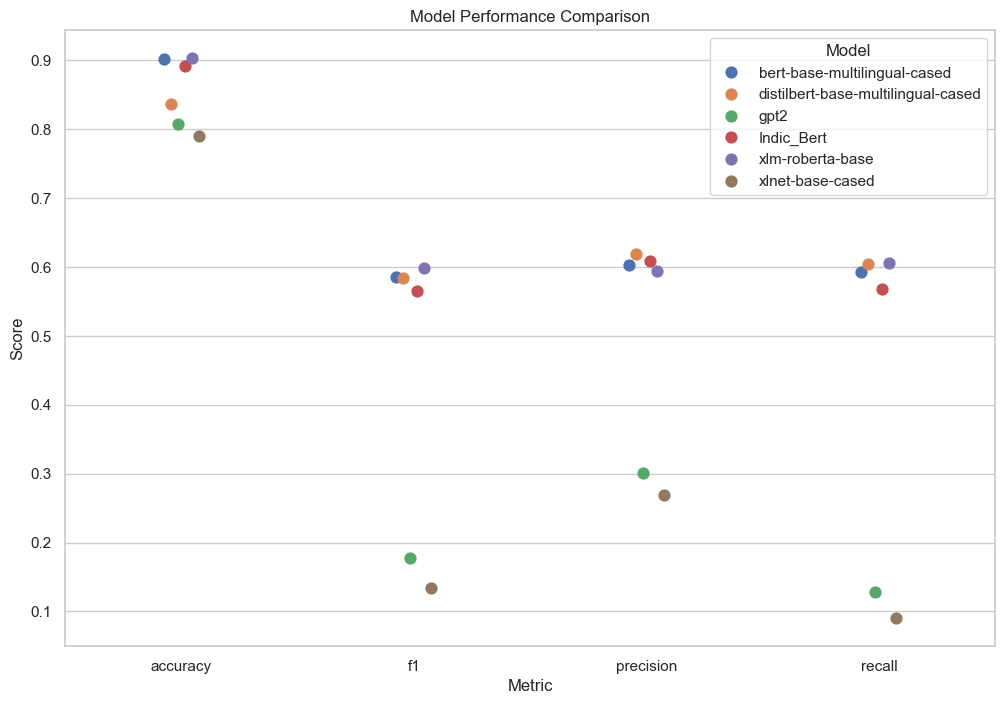

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.pointplot(x='Metric', y='Score', hue='Model', data=df, markers='o', linestyles='', dodge=True)
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.savefig('Multi_Metric_DotGraph.png')


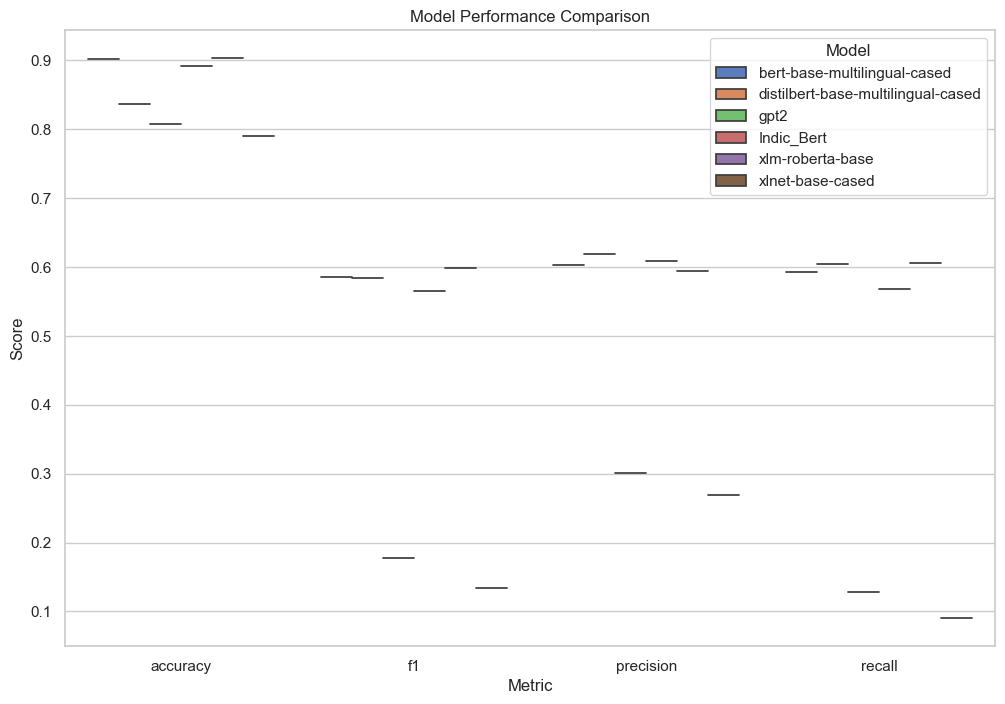

In [14]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Metric', y='Score', hue='Model', data=df, palette='muted', split=True)
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()


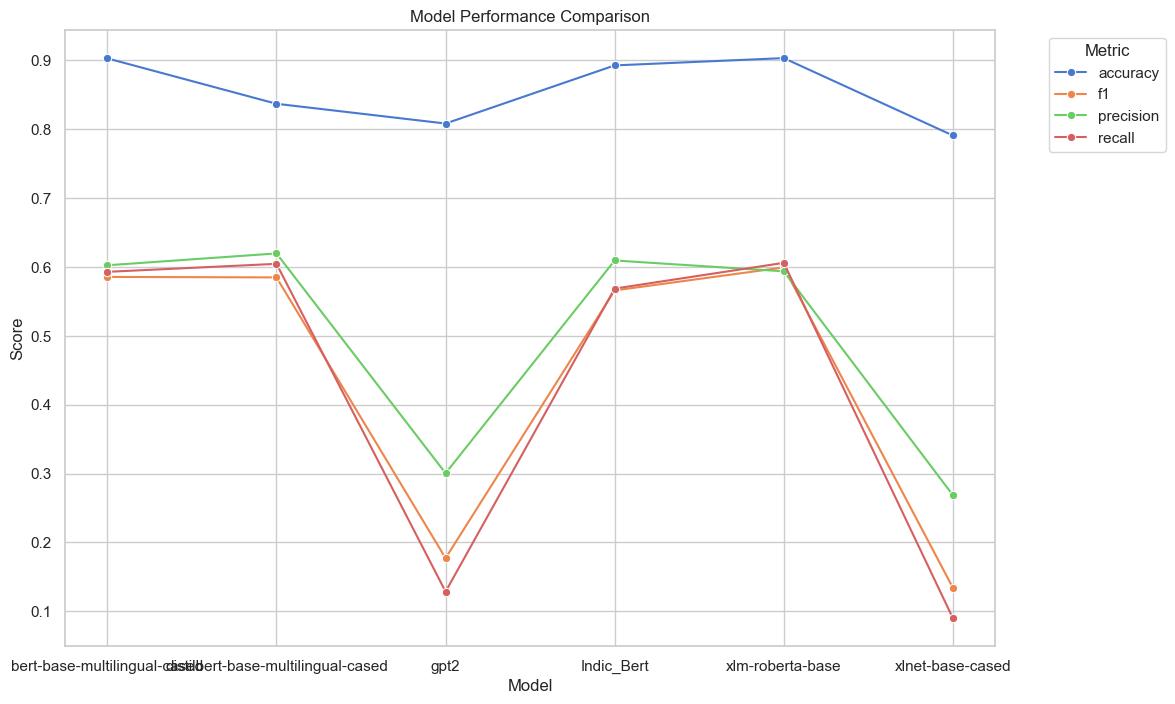

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Score', hue='Metric', data=df, marker='o', palette='muted')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("LineGraph_Changes.png")